In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

Load the DR3 activity file

In [9]:
act = pd.read_csv("../data/Kepler_activity_crossmatch.csv")
act.keys()

Index(['source_id', 'activityindex_espcs', 'activityindex_espcs_uncertainty',
       'ew_espels_halpha', 'ew_espels_halpha_uncertainty'],
      dtype='object')

In [94]:
lum.keys()

Index(['source_id', 'lum_flame', 'lum_flame_lower', 'lum_flame_upper'], dtype='object')

Load rotation and age files

In [91]:
lu_kepler = pd.read_csv("../../data/lu_kinematic_ages.csv", skiprows=72)
full_kepler = pd.read_csv("../../data/kepler_edr3_1arcsec.csv")
mc = pd.read_csv("../../data/Table_1_Periodic.txt")
lum = pd.read_csv("../data/just_lum-result.csv")

kepler1 = pd.merge(lu_kepler, full_kepler, how="left", left_on="KIC", right_on="kepid")
kepler = pd.merge(kepler1, mc, how="left", on="kepid", suffixes=["", "_mcquillan"])
kepler_with_lum = pd.merge(kepler, lum, on="source_id")
print(np.shape(lu_kepler), np.shape(full_kepler), np.shape(kepler), np.shape(kepler_with_lum))

(29949, 20) (198451, 134) (30184, 164) (7563, 167)


In [95]:
df = pd.merge(act, kepler_with_lum, on="source_id")

In [52]:
[col for col in df.columns if 'age' in col]

[]

Color points by activity indicator.

Text(0, 0.5, 'Prot [days]')

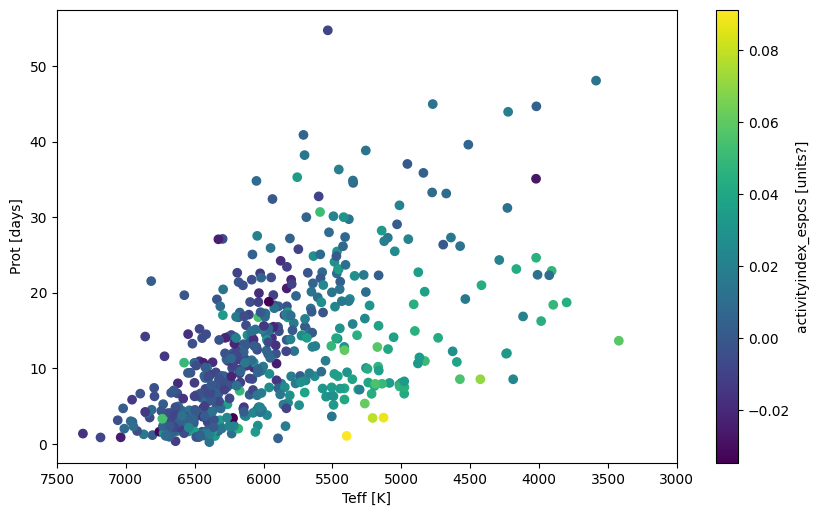

In [82]:
plt.figure(figsize=(10, 6), dpi=100)
plt.scatter(df.Teff, df.Prot, c=df.activityindex_espcs) # c=df.ew_espels_halpha, vmin=-.02, vmax=.2)
plt.colorbar(label="activityindex_espcs [units?]")
plt.xlim(7500, 3000)
plt.xlabel("Teff [K]")
plt.ylabel("Prot [days]")

Plot Gaia spectral activity indicator against Kepler photometric activity indicator (Rper).

Text(0, 0.5, 'activityindex_espcs [units?]')

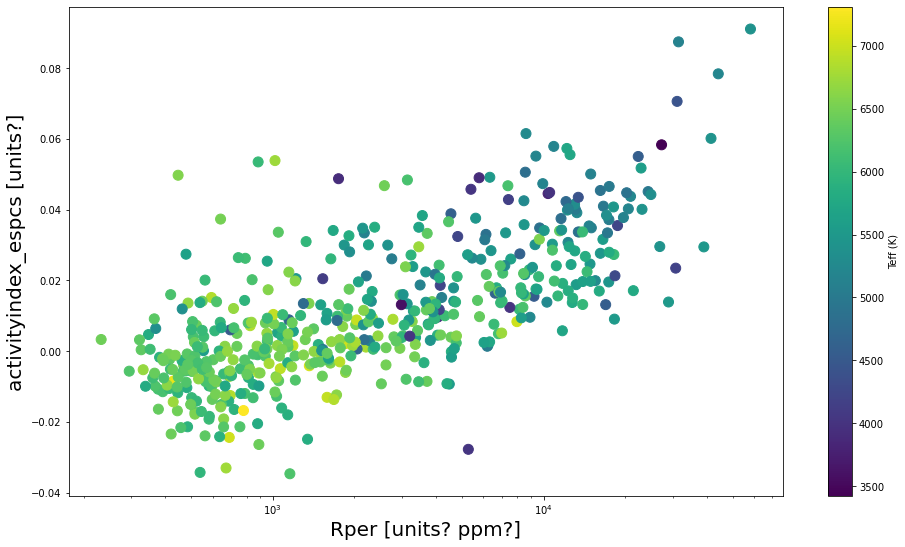

In [102]:
plt.figure(figsize=(16, 9))
plt.scatter(df.Rper, df.activityindex_espcs, c=df.Teff, s=100)
plt.colorbar(label="Teff (K)")
plt.xscale("log")
plt.xlabel("Rper [units? ppm?]", fontsize=20)
plt.ylabel("activityindex_espcs [units?]", fontsize=20)

Text(0, 0.5, 'activityindex_espcs [units?]')

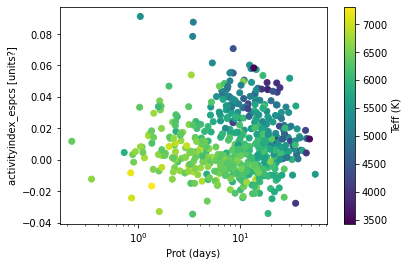

In [83]:
plt.scatter(df.Prot, df.activityindex_espcs, c=df.Teff)
plt.colorbar(label="Teff (K)")
plt.xscale("log")
plt.xlabel("Prot (days)")
plt.ylabel("activityindex_espcs [units?]")

In [53]:
lu_kepler.keys()

Index(['KIC', 'Prot', 'e_Prot', 'GaiaDR2', 'RA_ICRS', 'e_RA_ICRS', 'DE_ICRS',
       'e_DE_ICRS', 'Wvel', 'e_Wvel', 'sigma', 'e_sigma', 'GyroAge',
       'e_GyroAge', 'Ro', 'Teff', 'GMAG', 'Simbad', '_RA.icrs', '_DE.icrs'],
      dtype='object')

Plot Gaia spectral activity vs. kinematic age.

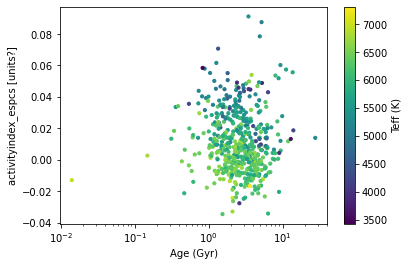

In [66]:
plt.scatter(df.GyroAge, df.activityindex_espcs, c=df.Teff, s=10)
plt.xscale("log")
plt.xlabel("Age (Gyr)")
plt.ylabel("activityindex_espcs [units?]")
plt.colorbar(label="Teff (K)")

Plot Gaia spectral activity vs. Rossby number.

Text(0.5, 0, 'Rossby number')

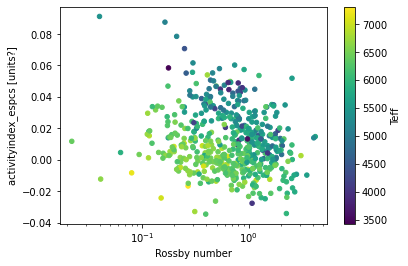

In [69]:
plt.scatter(df.Ro, df.activityindex_espcs, c=df.Teff, s=20)
plt.colorbar(label="Teff")
plt.xscale("log")
plt.ylabel("activityindex_espcs [units?]")
plt.xlabel("Rossby number")

Plot Calcium triplet activity against H alpha.

Text(0.5, 0, 'H alpha')

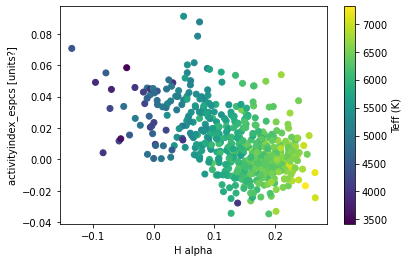

In [71]:
plt.scatter(df.ew_espels_halpha, df.activityindex_espcs, c=df.Teff)
plt.colorbar(label="Teff (K)")
plt.ylabel("activityindex_espcs [units?]")
plt.xlabel("H alpha")

Plot H alpha against age

(-1.0, 1.0)

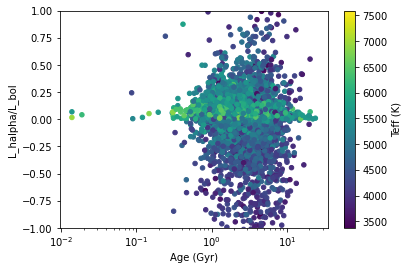

In [97]:
plt.scatter(df.GyroAge, df.ew_espels_halpha/df.lum_flame, c=df.Teff, s=20)
plt.colorbar(label="Teff (K)")
plt.ylabel("L_halpha/L_bol")
plt.xlabel("Age (Gyr)")
plt.xscale("log")
plt.ylim(-1, 1)

In [88]:
print(sum(np.isfinite(df.ew_espels_halpha)))

7552


In [89]:
print(sum(np.isfinite(df.activityindex_espcs)))

509
